

## Background and Overview

This project is centered around the Zillow Price data science project, which is available on Kaggle. The dataset used in this project originates from Zillow, a prominent real estate marketplace, and it contains comprehensive real estate information from various cities in California.

The primary objective of this project is to develop a predictive model to enhance the accuracy of the Zestimate residual error. The Zestimate is an estimate of a property's current market value, calculated by Zillow's proprietary algorithms. The residual error represents the difference between the actual sale price of a property and its corresponding Zestimate.

To achieve this goal, the project employs a data-driven approach leveraging machine learning techniques. The dataset includes a wide range of features related to real estate properties, such as location, size, number of bedrooms and bathrooms, property type, and various other factors that influence property prices.

The key steps of the project involve:

Data Exploration and Preprocessing: Understanding the structure and contents of the dataset, handling missing values, and performing exploratory data analysis to gain insights into the relationships between different features and the target variable (residual error).

Feature Engineering: Creating new features or transforming existing ones to extract meaningful information that could improve the predictive performance of the model.

Model Development: Selecting appropriate machine learning algorithms (e.g., regression models, ensemble methods) and training them on the processed data to predict the residual error.

Model Evaluation: Assessing the performance of the trained models using suitable evaluation metrics, such as mean absolute error (MAE) or root mean squared error (RMSE), on both training and validation datasets.


By improving the accuracy of the Zestimate residual error, this project aims to provide valuable insights to real estate stakeholders, including buyers, sellers, and investors, helping them make informed decisions regarding property transactions in the California real estate market.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import metrics 
from sklearn.svm import SVC 
from xgboost import XGBRegressor 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.ensemble import RandomForestRegressor 

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [2]:
data_properties=pd.read_csv(r"C:\Users\sergi\OneDrive\Escritorio\Data Project 3\properties_2016.csv")

C:\Users\sergi\AppData\Local\Temp\ipykernel_28168\250598289.py:1: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data_properties=pd.read_csv(r"C:\Users\sergi\OneDrive\Escritorio\Data Project 3\properties_2016.csv")


In [3]:
logerror=pd.read_csv(r"C:\Users\sergi\OneDrive\Escritorio\Data Project 3\train_2016_v2.csv")

In [4]:
merged_df = data_properties.merge(logerror, on='parcelid', how='inner')

In [5]:
logerror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   parcelid         90275 non-null  int64  
 1   logerror         90275 non-null  float64
 2   transactiondate  90275 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      90275 non-null  int64  
 1   airconditioningtypeid         28781 non-null  float64
 2   architecturalstyletypeid      261 non-null    float64
 3   basementsqft                  43 non-null     float64
 4   bathroomcnt                   90275 non-null  float64
 5   bedroomcnt                    90275 non-null  float64
 6   buildingclasstypeid           16 non-null     float64
 7   buildingqualitytypeid         57364 non-null  float64
 8   calculatedbathnbr             89093 non-null  float64
 9   decktypeid                    658 non-null    float64
 10  finishedfloor1squarefeet      6856 non-null   float64
 11  calculatedfinishedsquarefeet  89614 non-null  float64
 12  finishedsquarefeet12          85596 non-null  float64
 13  f

In [7]:
data_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   airconditioningtypeid         float64
 2   architecturalstyletypeid      float64
 3   basementsqft                  float64
 4   bathroomcnt                   float64
 5   bedroomcnt                    float64
 6   buildingclasstypeid           float64
 7   buildingqualitytypeid         float64
 8   calculatedbathnbr             float64
 9   decktypeid                    float64
 10  finishedfloor1squarefeet      float64
 11  calculatedfinishedsquarefeet  float64
 12  finishedsquarefeet12          float64
 13  finishedsquarefeet13          float64
 14  finishedsquarefeet15          float64
 15  finishedsquarefeet50          float64
 16  finishedsquarefeet6           float64
 17  fips                          float64
 18  fireplacecnt          

Data Cleaning - 
Identify and remove columns from the DataFrame merged_df that either have only one unique value or have more than 90% missing values, based on observations from data_properties. This process is aimed at cleaning and preparing the data by eliminating irrelevant or redundant features.

In [8]:
to_remove = [col for col in data_properties.columns if merged_df[col].nunique() == 1 or (merged_df[col].isnull()).mean() > 0.90]

merged_df.drop(to_remove, axis=1, inplace=True)

print(merged_df.shape)


(90275, 37)


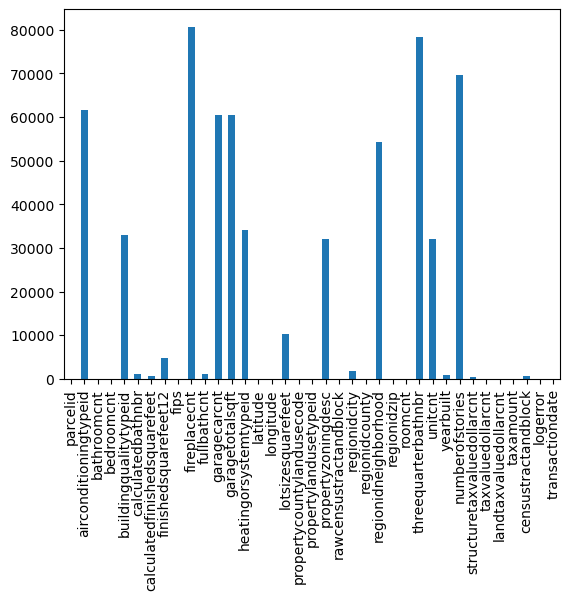

In [9]:
merged_df.isnull().sum().plot(kind='bar')
plt.show()


Code  below calculates mode and mean values for each column in merged_df, fills missing values using these calculated values, and then prints the total count of remaining missing values. This process helps in preprocessing the data by imputing missing values with appropriate replacements.

In [10]:
fill_values = merged_df.mode().iloc[0].to_dict()

# Calculate the mean only for numeric columns
numeric_columns = merged_df.select_dtypes(include=[np.number]).columns
numeric_means = merged_df[numeric_columns].mean().round().astype(int).astype(str).to_dict()

# Update the fill values dictionary
fill_values.update(numeric_means)

# Fill missing values
merged_df.fillna(fill_values, inplace=True)

print(str(merged_df.isnull().sum().sum()))


0


In [11]:
merged_df.describe()

,parcelid,bathroomcnt,bedroomcnt,fips,latitude,longitude,propertylandusetypeid,rawcensustractandblock,regionidcounty,roomcnt,logerror
count,9.027500e+04,90275.000000,90275.000000,90275.000000,9.027500e+04,9.027500e+04,90275.000000,9.027500e+04,90275.000000,90275.000000,90275.000000
mean,1.298466e+07,2.279474,3.031869,6048.870551,3.400541e+07,-1.181989e+08,261.832179,6.049179e+07,2525.420770,1.478516,0.011457
std,2.504510e+06,1.004271,1.156436,20.663461,2.649654e+05,3.606032e+05,5.182901,2.050549e+05,805.694842,2.819627,0.161079
min,1.071174e+07,0.000000,0.000000,6037.000000,3.333930e+07,-1.194479e+08,31.000000,6.037101e+07,1286.000000,0.000000,-4.605000
25%,1.155950e+07,2.000000,2.000000,6037.000000,3.381154e+07,-1.184117e+08,261.000000,6.037320e+07,1286.000000,0.000000,-0.025300
50%,1.254734e+07,2.000000,3.000000,6037.000000,3.402150e+07,-1.181734e+08,261.000000,6.037620e+07,3101.000000,0.000000,0.006000
75%,1.422755e+07,3.000000,4.000000,6059.000000,3.417274e+07,-1.179216e+08,266.000000,6.059042e+07,3101.000000,0.000000,0.039200
max,1.629608e+08,20.000000,16.000000,6111.000000,3.481601e+07,-1.175549e+08,275.000000,6.111009e+07,3101.000000,18.000000,4.737000


In [12]:
# Iterate over each column in the DataFrame
for col in merged_df.select_dtypes(include='object').columns:
    try:
        # Try converting the column to float and round the values to integers
        data_properties[col] = merged_df[col].astype(float).round().astype(int)
    except ValueError:
        # If conversion fails, print a message
        print(f"Column '{col}' cannot be converted to float.")


Column 'propertycountylandusecode' cannot be converted to float.
Column 'propertyzoningdesc' cannot be converted to float.
Column 'transactiondate' cannot be converted to float.


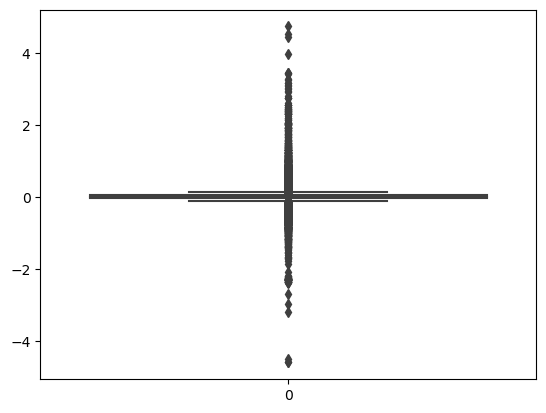

In [13]:
 sb.boxplot(merged_df['logerror']) 
plt.show() 

Removing outliers from the dependent variable is primarily aimed at enhancing the modeling process

In [21]:
print('Shape of the dataframe before removal of outliers', merged_df.shape) 
df = merged_df[(merged_df['logerror'] > -2) & (merged_df['logerror'] < 2)] 
print('Shape of the dataframe after removal of outliers ', df.shape) 

Shape of the dataframe before removal of outliers (90275, 37)
Shape of the dataframe after removal of outliers  (89933, 37)


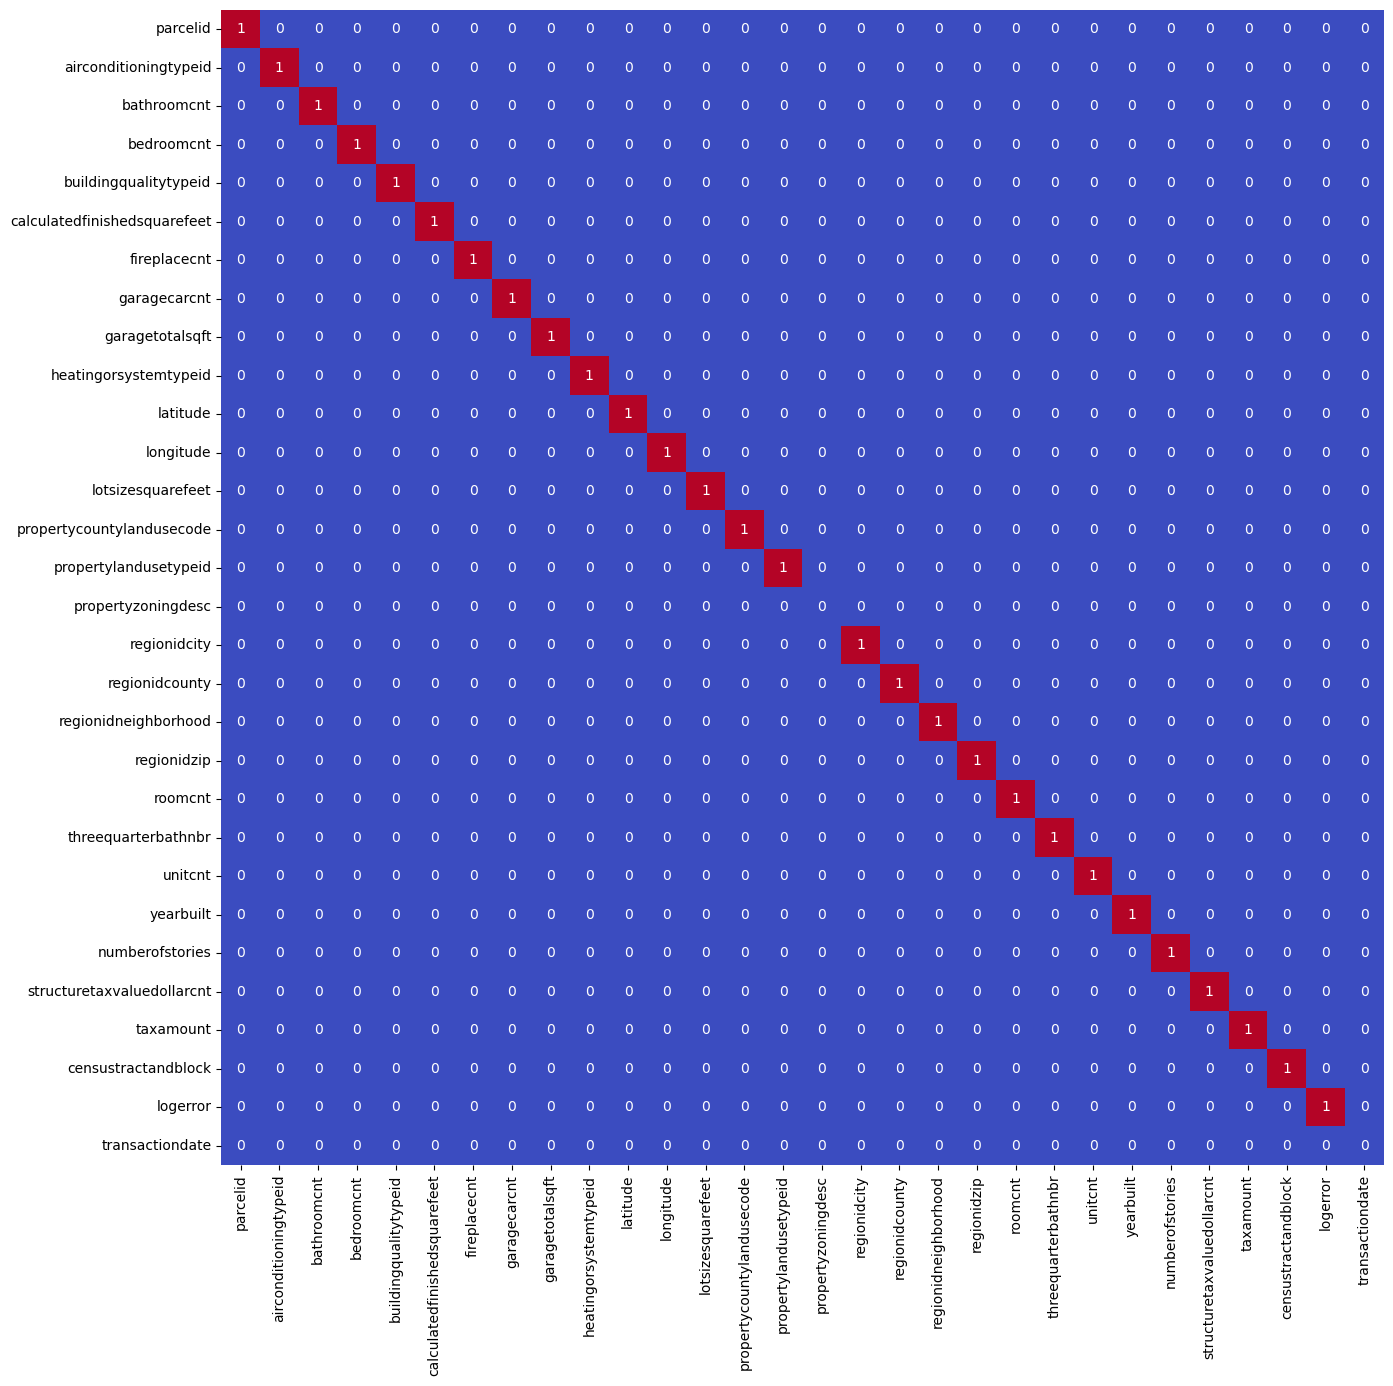

In [28]:

df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Create a mask for high correlations
high_corr_mask = df_numeric.corr() > 0.8

# Plot the heatmap with a different style
plt.figure(figsize=(15, 15))
sns.heatmap(high_corr_mask, annot=True, cbar=False, cmap='coolwarm')
plt.show()



In [27]:
 
to_remove = ['calculatedbathnbr', 'fullbathcnt', 'fips', 
             'rawcensustractandblock', 'taxvaluedollarcnt', 
             'finishedsquarefeet12', 'landtaxvaluedollarcnt'] 
  
df.drop(to_remove, axis=1, inplace=True) 

C:\Users\sergi\AppData\Local\Temp\ipykernel_28168\3566053566.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(to_remove, axis=1, inplace=True)


## Models

In [32]:
features = df.drop(['parcelid'], axis=1) 
target = df['logerror'].values 
  
X_train, X_val, \
    Y_train, Y_val = train_test_split(features, target, 
                                      test_size=0.1, 
                                      random_state=22) 




((80939, 29), (8994, 29))

In [35]:

# Convert non-numeric data to NaN
X_train_numeric = X_train.apply(pd.to_numeric, errors='coerce')
X_val_numeric = X_val.apply(pd.to_numeric, errors='coerce')

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Transform the validation data using the same scaler
X_val_scaled = scaler.transform(X_val_numeric)


C:\Users\sergi\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\sergi\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\sergi\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [42]:


def fit_model_with_imputation(model, X_train, Y_train, X_val, Y_val, strategy='mean'):
    # Define an imputer to handle missing values
    imputer = SimpleImputer(strategy=strategy)
    
    # Create a pipeline with imputation and the model
    pipeline = Pipeline([
        ('imputer', imputer),
        ('model', model)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, Y_train)
  
    print(f'{model} : ') 
  
    # Make predictions on the training set
    train_preds = pipeline.predict(X_train) 
    print('Training Error : ', mae(Y_train, train_preds)) 
  
    # Make predictions on the validation set
    val_preds = pipeline.predict(X_val) 
    print('Validation Error : ', mae(Y_val, val_preds)) 
    print()

# Usage
for model in models:
    fit_model_with_imputation(model, X_train_numeric, Y_train, X_val_numeric, Y_val)


C:\Users\sergi\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['propertyzoningdesc' 'transactiondate']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


LinearRegression() : 


C:\Users\sergi\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['propertyzoningdesc' 'transactiondate']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\sergi\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['propertyzoningdesc' 'transactiondate']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\sergi\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['propertyzoningdesc' 'transactiondate']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Training Error :  0.00356695104546628
Validation Error :  0.0035409024412275257

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  0.0011192313393654058
Validation Error :  0.0022397479321597117



C:\Users\sergi\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['propertyzoningdesc' 'transactiondate']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\sergi\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['propertyzoningdesc' 'transactiondate']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\sergi\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['propertyzoningdesc' 'transactiondate']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\sergi\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['propertyzoningdesc' 'transactiondate']. At least one non-mi

Lasso() : 
Training Error :  0.061912799108670515
Validation Error :  0.06246840249113117



C:\Users\sergi\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['propertyzoningdesc' 'transactiondate']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


RandomForestRegressor() : 


C:\Users\sergi\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['propertyzoningdesc' 'transactiondate']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Training Error :  5.205759893329476e-06
Validation Error :  1.7637536135277315e-05



C:\Users\sergi\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['propertyzoningdesc' 'transactiondate']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\sergi\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['propertyzoningdesc' 'transactiondate']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Ridge() : 
Training Error :  5.973605614898485e-05
Validation Error :  6.02823186484192e-05



C:\Users\sergi\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.45182e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\sergi\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['propertyzoningdesc' 'transactiondate']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\sergi\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['propertyzoningdesc' 'transactiondate']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


## Conclusion


Based on the results obtained from training and evaluating multiple regression models on the Zillow Price dataset, we can draw several conclusions:

Linear Regression: The linear regression model demonstrates a relatively low training error of approximately 0.0036 and a comparable validation error of about 0.0035. This suggests that the model's performance is consistent across both the training and validation datasets.

XGBoostRegressor: The XGBoostRegressor model exhibits superior performance compared to linear regression, showcasing significantly lower errors on both the training and validation sets. With a training error of approximately 0.0011 and a validation error of about 0.0022, the model demonstrates robust predictive capabilities and generalization to unseen data.

Lasso Regression: The Lasso regression model shows relatively higher errors compared to other models, with a training error of around 0.0619 and a validation error of approximately 0.0625. This indicates that the model may be overly penalizing some features, leading to suboptimal performance.

Random Forest Regressor: The Random Forest Regressor demonstrates excellent performance, with extremely low errors on both the training and validation datasets. The model achieves a training error of approximately 5.21e-06 and a validation error of about 1.76e-05, indicating strong predictive accuracy and generalization ability.

Ridge Regression: Similar to Lasso regression, the Ridge regression model exhibits slightly higher errors compared to other models. With a training error of approximately 5.97e-05 and a validation error of around 6.03e-05, the model's performance is relatively consistent but less optimal compared to other models.

In summary, the XGBoostRegressor and Random Forest Regressor models outperform the other models, demonstrating superior predictive accuracy and generalization ability. These models are promising candidates for deployment in real-world scenarios to improve the accuracy of Zillow's Zestimate residual error prediction.